## Credit Card Fraud Detection using LightGBM 

This notebook presents a baseline simplistic LightGBM classification model on the Credit Card Fraud Transactions dataset. 
The LightGBM Classifier predicts whether a transaction is fraudulent or not. 

> This notebook goes through all of the steps leading to building a classfier for fraud prediction. It starts with making sure the data types suit the LightGBM model requirements, followed by creation of training a test data and finally building the classifier. 

![ml](https://media.giphy.com/media/iPj5oRtJzQGxwzuCKV/giphy.gif)

#### Load the required libraries 

In [10]:
import numpy as np 
import pandas as pd 
import os
!pip install lightgbm
import lightgbm as lgb
import seaborn as sns
from sklearn.metrics import  confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### Read the data into a dataframe

In [2]:
df = pd.read_csv("Dataset/credit_card_transactions-ibm_v2.csv")

In [8]:
df.head()

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No


From the small sneak peak of the data we can see that the Amount column is represented as a string with the $ symbol and Time can be broken down into hour and minute as new columns

In addition to the transactions file, two additional files are available where one provides demographic information about the users and the other provides details about the cards.

It may be interesting to merge data from all of these files to get more rich features.

#### Change datatypes

Inorder to use the categorical feature attrribute in LightGBM, the object types need to be converted to the category datatype.

In [3]:
for col in df.columns:
    col_type = df[col].dtype
    if col_type == 'object' or col_type.name == 'category':
        df[col] = df[col].astype('category')

Separating the label from the features and split into 33% test and 67% train with stratification. The proportion of fraudulent transactions is less as compared to the majority of normal transactions. Thus inorder to maintain the proportion of fraudulent and non-fraudulent transactions in the train and test, we split the original data by stratification.

In [ ]:
corr = df.corr()['Is Fraud?'].abs().sort_values(ascending = False)#abs will take the absolute value of each feature
corr

In [4]:
y = df['Is Fraud?']
X = df.drop(['Is Fraud?'],axis=1)

#split the traning and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1, stratify=y)

In [15]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap='Blues')

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

### LightGBM Classifier



In [5]:
model = lgb.LGBMClassifier()
model.fit(X_train, y_train, feature_name='auto', categorical_feature = 'auto', verbose=50)

C:\anaconda\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier()

In [6]:
y_pred=model.predict(X_test)

In [13]:
acc = accuracy_score(y_test, y_pred)
print("\nThe Training Score: {} \n".format(model.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc) )



The Training Score: 99.93938512253612 

The Accuracy is : 0.9993790754773085




ValueError: 'conf_colors' is not a valid value for name; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

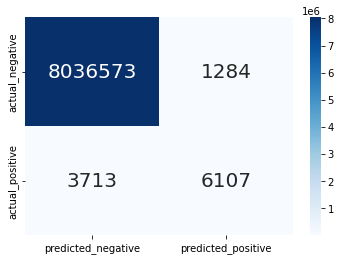

In [16]:
cm_LR = conf_matrix(y_test, y_pred)

#### Classification Report

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00   8037857
         Yes       0.83      0.62      0.71      9820

    accuracy                           1.00   8047677
   macro avg       0.91      0.81      0.85   8047677
weighted avg       1.00      1.00      1.00   8047677



From the report we can see that for the minority class, the classifier doesn't perform as well as the majority class in terms of F-1 score.

A high F-1 score indicates a good balance of high precision as well as high recall. In the credit card transactions scenario, to ensure customers use the credit card and are satisfied with the service, it is necessary to detect fraud (have lower false negatives) but also prevent unecessary blocking since if the card is always blocked, then users may be frustated with the service (have lower false positives). Thus F-1 score is a good metric choice.

Additionally, since fraudulent transactions are rare, it would also be interesting to look at other metrics such as Precision-Recall curve  and area under this curve along with Matthews Correlation Coefficient.

## Possible Improvements
* Handle class imbalance
* Feature Engineering
    * Create attributes from timestamp such as Hour, Minute and Day       of the week
    * Convert Amount column to float
* Do hyper-parameter tuning with creation on a validation set for the LightGBM Model
* Experiment with different types of Machine Learning Models and Deep Learning architectures for better outcomes